In [15]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [17]:
# load data
iris = datasets.load_iris()
X = iris.data[:, 0:2]
y = iris.target

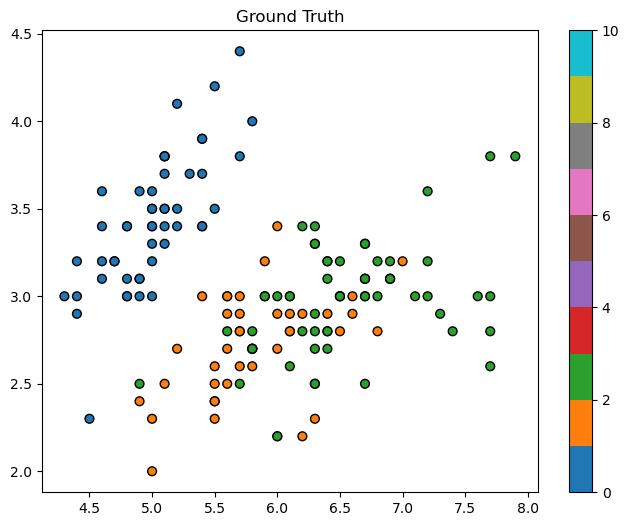

In [19]:
# plot ground truth
plt.figure(figsize=(8, 6))
sc = plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'tab10', edgecolor='k', s = 40, vmin=0, vmax=10)
plt.colorbar(sc)
plt.title('Ground Truth')
plt.show()

In [21]:
# initialize centers for kmeans
# initialize centroids
estimators = [('k=9', KMeans(n_clusters=9)), 
              ('k=6', KMeans(n_clusters=6)),
              ('k=3', KMeans(n_clusters=3)),
              # initialize centroids randomly
              ('k=3 (random initialization)', KMeans(n_clusters=3, n_init=1, init='random'))]


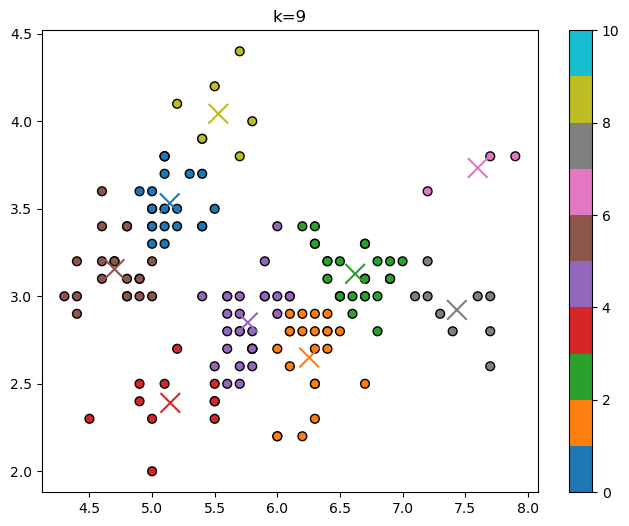

The accuracy is: 0.340000


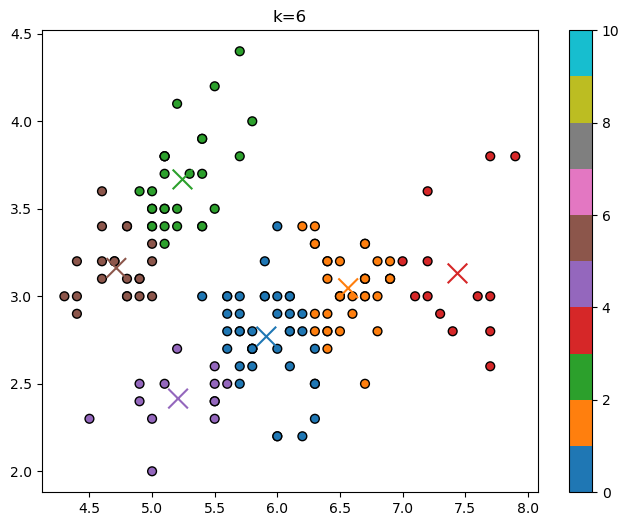

The accuracy is: 0.073333


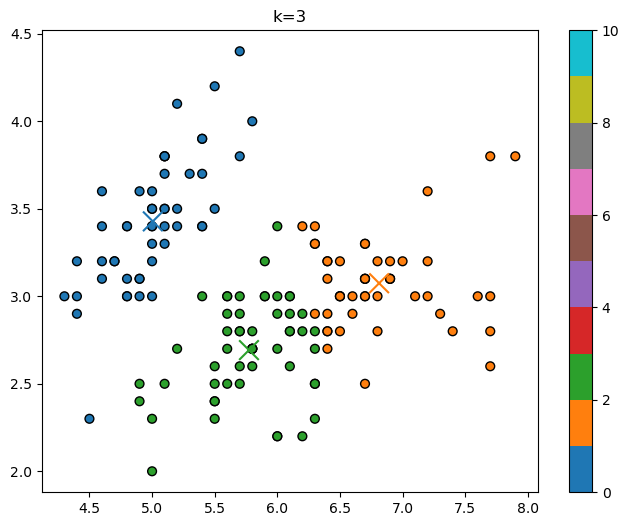

The accuracy is: 0.513333


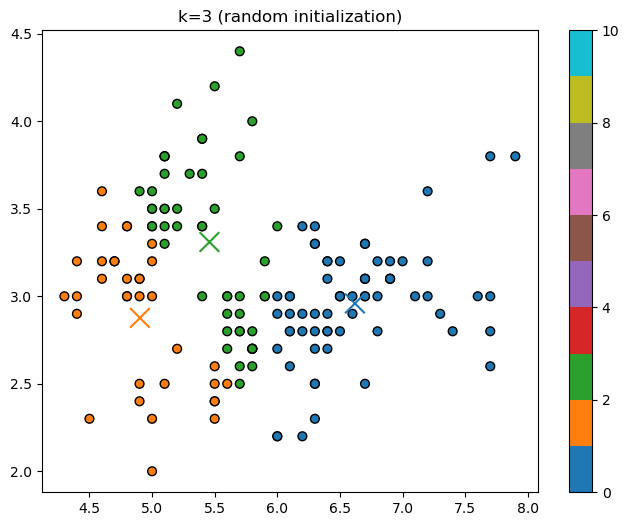

The accuracy is: 0.113333


In [23]:
for name, model in estimators:
    plt.figure(figsize=(8, 6))
    # fit k-means for different number of clusters
    model.fit(X) 
    labels = model.labels_
    
    # let the color of the points related with the labels
    # define vmin and vmax for the upper and lower limits of the colorbar
    # such that all plots will have the same color scale 
    # tab-10 is the colormap for discrete value
    sc = plt.scatter(X[:, 0], X[:, 1], c= labels, cmap = 'tab10', edgecolor='k', s = 40, vmin=0, vmax=10) 

    # show colorbar
    plt.colorbar(sc) 
    
    # cluster_centers_ is an array, [row = n_clusters, col = n_features], 
    # cluster centers are marked by 'x'
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker = 'x', s = 200, c = np.arange(len(model.cluster_centers_)), cmap = 'tab10', vmin=0, vmax=10) 
  
    plt.title(name)
    plt.show()
    # print estimation accuracy
    print('The accuracy is: %f'%accuracy_score(y, labels)) 